In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report

In [3]:
data = pd.read_csv('data.csv')
column_name = "RF_LeThuy"

##### Không thể thay đổi trực tiếp DataFrame nên cần copy

In [4]:
X = data[column_name].copy()

##### Thay thế những giá trị 'x' bằng trị phổ biến nhất

In [5]:
mode_value = X.mode()[0]
X[X == 'x'] = mode_value

##### Chuyển đổi thành kiểu float

In [6]:
X = X.astype(float)

In [7]:
wcss = []

# Thử nghiệm với một loạt số lượng cụm
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X.values.reshape(-1, 1))
    wcss.append(kmeans.inertia_)

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The defa

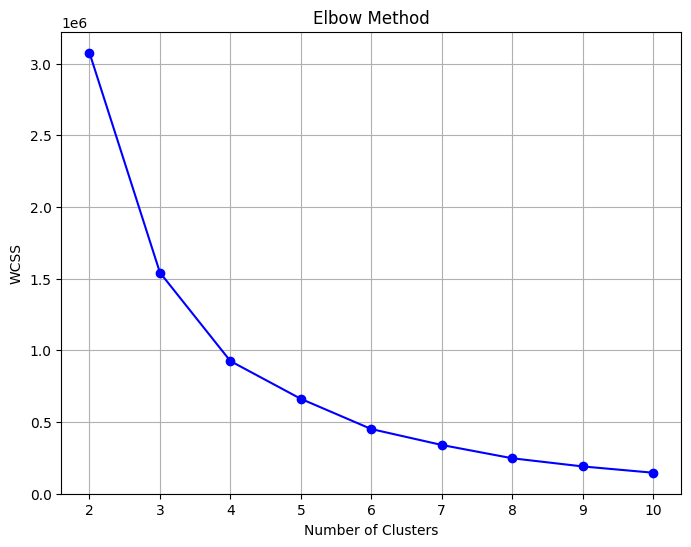

In [8]:
# Vẽ biểu đồ Elbow để xác định số lượng cụm phù hợp
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.grid()
plt.show()

In [9]:
k = 3
kmeans = KMeans(n_clusters=k)
X = X.values.reshape(-1, 1)
kmeans.fit(X)
labels = kmeans.labels_

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [10]:
for i in range(k):
  print(f"Cluster {i}: {len(labels[labels == i])} data points")

Cluster 0: 15284 data points
Cluster 1: 98 data points
Cluster 2: 689 data points


In [11]:
clustered_data = pd.DataFrame({'Label': labels, 'Value': X.reshape(-1)})

merged_data = data.copy()
merged_data['Label'] = clustered_data['Label']

In [12]:
clusters = merged_data['Label'].unique()

for cluster in clusters:
    print(cluster)
    cluster_data = merged_data[merged_data['Label'] == cluster]
    cluster_data['Date'] = pd.to_datetime(cluster_data['Date'])  # Convert the Date column to datetime
    month_counts = cluster_data['Date'].dt.month.value_counts()
    print(month_counts)

0
Date
3     1358
1     1356
7     1336
5     1322
12    1316
8     1305
4     1296
6     1281
2     1237
9     1176
11    1176
10    1125
Name: count, dtype: int64
1
Date
10    41
9     23
11    21
8      7
7      3
5      2
6      1
Name: count, dtype: int64
2
Date
10    198
11    123
9     121
8      52
12     48
5      40
6      38
7      25
4      24
1       8
2       6
3       6
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_12824\351415395.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['Date'] = pd.to_datetime(cluster_data['Date'])  # Convert the Date column to datetime
C:\Users\Admin\AppData\Local\Temp\ipykernel_12824\351415395.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['Date'] = pd.to_datetime(cluster_data['Date'])  # Convert the Date column to datetime
C:\Users\Admin\AppData\Local\Temp\ipykernel_12824\351415395.py:6: SettingWithCopyWarning: 

In [13]:
# Tìm giá trị min và max cho từng cụm
min_max_values = clustered_data.groupby('Label')['Value'].agg(['min', 'max'])

# # In ra giá trị min và max cho từng cụm
for cluster_label, min_max in min_max_values.iterrows():
    print(f"Cluster {cluster_label}:")
    print(f"Min Value: {min_max['min']}")
    print(f"Max Value: {min_max['max']}")

Cluster 0:
Min Value: 0.0
Max Value: 31.5
Cluster 1:
Min Value: 142.2
Max Value: 686.6
Cluster 2:
Min Value: 31.6
Max Value: 140.5


In [18]:
data['Month'] = pd.to_datetime(data['Date']).dt.month
print(data)

             Date  RF_DongTam  RF_MaiHoa  RF_KienGiang RF_LeThuy  RF_TanMy  \
0        1/1/1977         2.0        0.0           0.0         0       0.0   
1        1/2/1977         4.0        6.2           6.0       1.5       3.0   
2        1/3/1977         4.4        2.5           0.0       1.4       2.2   
3        1/4/1977        23.6       25.4           2.5       4.6      30.2   
4        1/5/1977         0.0        0.0           3.0       0.3       0.0   
...           ...         ...        ...           ...       ...       ...   
16066  12/27/2020         0.0        0.0           0.0         0       0.0   
16067  12/28/2020         0.0        0.0           0.4         0       0.0   
16068  12/29/2020         0.0        0.0           0.0         0       0.0   
16069  12/30/2020         1.4        1.1           7.6       0.4       0.0   
16070  12/31/2020         0.0        0.0           4.8         0       0.3   

       RF_MinhHoa RF_BaDon RF_DongHoi  WL_LeThuy  WL_KienGiang 

##### Chia tập dữ liệu thành 2 cụm 
> Cụm 1: 12 - 8 (Mưa ít)
> Cụm 2: 9 - 11 (Mưa nhiều)

In [54]:
dt1 = data[data['Month'].between(12, 12) | data['Month'].between(1, 8)][['Date', column_name]]
dt2 = data[data['Month'].between(9, 11)][column_name]

0          0
1        1.5
2        1.4
3        4.6
4        0.3
        ... 
16066      0
16067      0
16068      0
16069    0.4
16070      0
Name: RF_LeThuy, Length: 12067, dtype: object


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
